In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# USING PREVIOUS DATASET
chips=pd.read_csv("chips_final.csv")
chips.head()

,Unnamed: 0,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE,QTY_CONSUMED
0,0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0,Small,350.0
1,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0,Small,150.0
2,2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0,Medium,210.0
3,3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0,Small,175.0
4,4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0,Small,160.0


In [3]:
# Trial stores: 77,86,88

In [4]:
chips['DATE'].dtype

dtype('O')

In [9]:
# convert datatype of DATE column into datetime
chips['DATE']=pd.to_datetime(chips['DATE'])
chips['DATE'].dtype

dtype('<M8[ns]')

In [11]:
chips['MONTH_YEAR']=chips['DATE'].dt.to_period('M')
chips.head()

,Unnamed: 0,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE,QTY_CONSUMED,MONTH_YEAR
0,0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0,Small,350.0,2018-10
1,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0,Small,150.0,2018-09
2,2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0,Medium,210.0,2019-03
3,3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0,Small,175.0,2019-03
4,4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0,Small,160.0,2018-11


In [13]:
Monthly_Sales=chips.groupby(['STORE_NBR','MONTH_YEAR'])['TOT_SALES'].sum().reset_index(name='MONTHLY_SALES')
Monthly_Sales

,STORE_NBR,MONTH_YEAR,MONTHLY_SALES
0,1,2018-07,206.9
1,1,2018-08,176.1
2,1,2018-09,278.8
3,1,2018-10,188.1
4,1,2018-11,192.6
...,...,...,...
3164,272,2019-02,395.5
3165,272,2019-03,442.3
3166,272,2019-04,445.1
3167,272,2019-05,314.6


In [15]:
total_cust=chips.groupby(['STORE_NBR','MONTH_YEAR'])['LYLTY_CARD_NBR'].nunique().reset_index(name='MONTHLY_CUST')
total_cust

,STORE_NBR,MONTH_YEAR,MONTHLY_CUST
0,1,2018-07,49
1,1,2018-08,42
2,1,2018-09,59
3,1,2018-10,44
4,1,2018-11,46
...,...,...,...
3164,272,2019-02,45
3165,272,2019-03,50
3166,272,2019-04,54
3167,272,2019-05,34


In [17]:
# Total no of transactions per store per month
total_trans=chips.groupby(['STORE_NBR','MONTH_YEAR'])['TXN_ID'].count().reset_index(name='MONTHLY_TRANS')
total_trans

,STORE_NBR,MONTH_YEAR,MONTHLY_TRANS
0,1,2018-07,52
1,1,2018-08,43
2,1,2018-09,62
3,1,2018-10,45
4,1,2018-11,47
...,...,...,...
3164,272,2019-02,48
3165,272,2019-03,53
3166,272,2019-04,56
3167,272,2019-05,40


In [19]:
# average no.of transactions per cust ( montgly transactions/ total no of customers per month)
#  for this we need both total_transactions and Total no of customers in one df --- Merge above metrics
MONTHLY_METRIC= Monthly_Sales.merge(total_cust, on=['STORE_NBR','MONTH_YEAR'], how='inner').merge(total_trans, on=['STORE_NBR','MONTH_YEAR'], how='inner')
MONTHLY_METRIC['AVG_NO.OF_TRANS_PER_CUSTOMER']=MONTHLY_METRIC['MONTHLY_TRANS']/MONTHLY_METRIC['MONTHLY_CUST']
MONTHLY_METRIC

,STORE_NBR,MONTH_YEAR,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS,AVG_NO.OF_TRANS_PER_CUSTOMER
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739
...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,48,1.066667
3165,272,2019-03,442.3,50,53,1.060000
3166,272,2019-04,445.1,54,56,1.037037
3167,272,2019-05,314.6,34,40,1.176471


In [21]:
trial_stores = [77, 86, 88]

In [23]:
#trial stores monthly sales
trial=Monthly_Sales[Monthly_Sales['STORE_NBR'].isin(trial_stores)]
trial

,STORE_NBR,MONTH_YEAR,MONTHLY_SALES
880,77,2018-07,296.80
881,77,2018-08,255.50
882,77,2018-09,225.20
883,77,2018-10,204.50
884,77,2018-11,245.30
885,77,2018-12,267.30
886,77,2019-01,204.40
887,77,2019-02,235.00
888,77,2019-03,278.50
889,77,2019-04,263.50


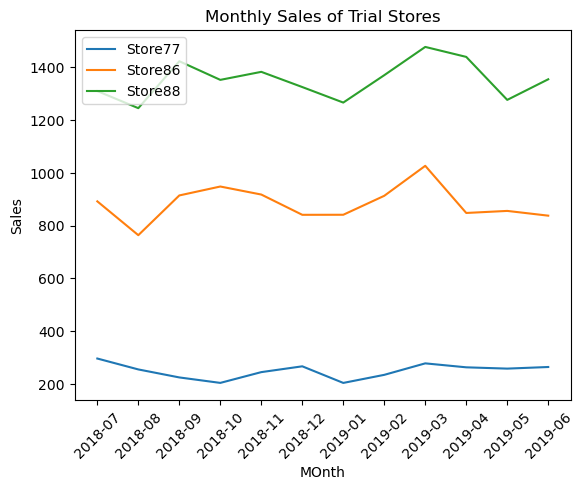

In [25]:
# spot unusal sales -- plot monthly sales of eaxh store
for x in trial_stores:
    sales= Monthly_Sales[Monthly_Sales['STORE_NBR']==x]
    plt.plot(sales['MONTH_YEAR'].astype(str),sales['MONTHLY_SALES'],label=f'Store{x}')
plt.legend()

plt.xlabel("MOnth")
plt.ylabel("Sales")
plt.title("Monthly Sales of Trial Stores")

plt.xticks(rotation=45)

plt.show()

In [27]:
#filtering 
mask_beforetrial=MONTHLY_METRIC['MONTH_YEAR']<'2019-02' 
pre_trial=MONTHLY_METRIC[mask_beforetrial]
pre_trial

,STORE_NBR,MONTH_YEAR,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS,AVG_NO.OF_TRANS_PER_CUSTOMER
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739
...,...,...,...,...,...,...
3159,272,2018-09,304.7,32,36,1.125000
3160,272,2018-10,430.6,44,51,1.159091
3161,272,2018-11,376.2,41,45,1.097561
3162,272,2018-12,403.9,47,47,1.000000


In [29]:
# Storewise Total Sales amount
Total_Amount= pre_trial.groupby('STORE_NBR')['MONTHLY_SALES'].sum()
Total_Amount[[77,86,88]]


STORE_NBR
77    1699.00
86    6119.85
88    9305.00
Name: MONTHLY_SALES, dtype: float64

In [31]:
trial_stores

[77, 86, 88]

In [33]:
def best_control_store(trial_store,df,metric=["MONTHLY_SALES"]):
    trial_df=pre_trial[pre_trial['STORE_NBR']==trial_store].set_index('MONTH_YEAR')     
    trial_df=trial_df[metric]
    
    control_score=[]  # for storing correlation scores
    
    stores=pre_trial['STORE_NBR'].unique() #[1,2,....77,..86,87,88,89,....]
    control_stores=[i for i in stores if i not in [77, 86, 88]] #[1,...76,78,...85,87,89,...]
    
    #Now we need trial_df like df for each control store to be compared with trial_df
    for i in control_stores:
        control_df= pre_trial[pre_trial['STORE_NBR']==i].set_index('MONTH_YEAR')
        control_df=control_df[metric]

        if len(trial_df)==len(control_df):# to make sure equal no of months
            r=trial_df.corrwith(control_df)
            avg_corr=r.mean()
            control_score.append({"Trial Store":trial_store,"control_store":i,"Avg correlation":avg_corr})

    result=pd.DataFrame(control_score)
    correlations_scores=result.sort_values(by="Avg correlation",ascending=False)
    return correlations_scores

In [35]:
print(best_control_store(77,pre_trial).head(1))
print(best_control_store(86,pre_trial).head(1))
print(best_control_store(88,pre_trial).head(1))

     Trial Store  control_store  Avg correlation
218           77            233         0.935848
     Trial Store  control_store  Avg correlation
144           86            155         0.888765
     Trial Store  control_store  Avg correlation
148           88            159         0.857709


In [37]:
control_stores=[233,155,159]

In [39]:
trial_stores

[77, 86, 88]

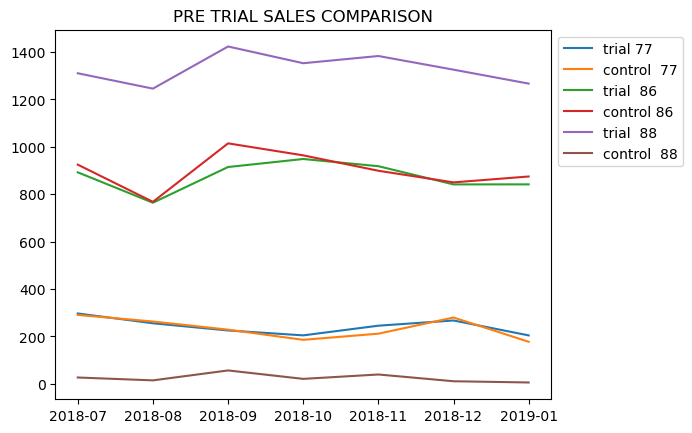

In [41]:
trial_77=pre_trial[pre_trial['STORE_NBR']==77]
control_77=pre_trial[pre_trial['STORE_NBR']==233]
plt.plot(trial_77['MONTH_YEAR'].astype(str),trial_77['MONTHLY_SALES'],label='trial 77')
plt.plot(control_77['MONTH_YEAR'].astype(str),control_77['MONTHLY_SALES'],label='control  77')




trial_86=pre_trial[pre_trial['STORE_NBR']==86]
control_155=pre_trial[pre_trial['STORE_NBR']==155]
plt.plot(trial_86['MONTH_YEAR'].astype(str),trial_86['MONTHLY_SALES'],label='trial  86')
plt.plot(control_155['MONTH_YEAR'].astype(str),control_155['MONTHLY_SALES'],label='control 86')



trial_88=pre_trial[pre_trial['STORE_NBR']==88]
control_159=pre_trial[pre_trial['STORE_NBR']==159]
plt.plot(trial_88['MONTH_YEAR'].astype(str),trial_88['MONTHLY_SALES'],label='trial  88')
plt.plot(control_159['MONTH_YEAR'].astype(str),control_159['MONTHLY_SALES'],label='control  88')

plt.title("PRE TRIAL SALES COMPARISON")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [43]:
#Calculate total pre-trial sales for all stores
sales_total = pre_trial.groupby('STORE_NBR')['MONTHLY_SALES'].sum().sort_values()

print(sales_total)

STORE_NBR
193        1.80
211        2.60
206        3.00
252        3.70
76         6.00
         ...   
4       9127.00
58      9156.75
88      9305.00
237     9307.20
226    10197.65
Name: MONTHLY_SALES, Length: 271, dtype: float64


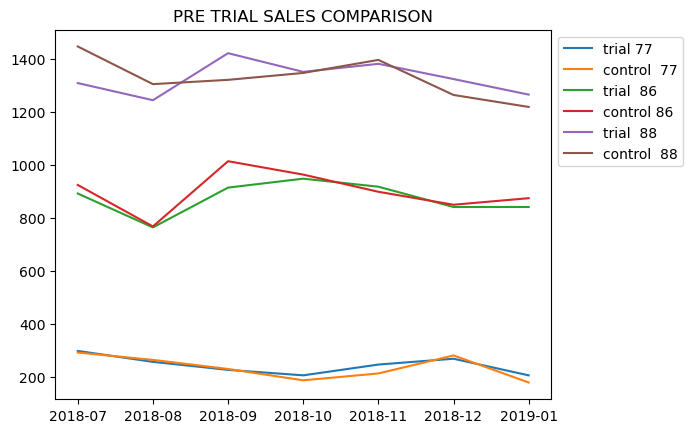

In [85]:
trial_77=pre_trial[pre_trial['STORE_NBR']==77]
control_77=pre_trial[pre_trial['STORE_NBR']==233]
plt.plot(trial_77['MONTH_YEAR'].astype(str),trial_77['MONTHLY_SALES'],label='trial 77')
plt.plot(control_77['MONTH_YEAR'].astype(str),control_77['MONTHLY_SALES'],label='control  77')




trial_86=pre_trial[pre_trial['STORE_NBR']==86]
control_155=pre_trial[pre_trial['STORE_NBR']==155]
plt.plot(trial_86['MONTH_YEAR'].astype(str),trial_86['MONTHLY_SALES'],label='trial  86')
plt.plot(control_155['MONTH_YEAR'].astype(str),control_155['MONTHLY_SALES'],label='control 86')



trial_88=pre_trial[pre_trial['STORE_NBR']==88]
control_237=pre_trial[pre_trial['STORE_NBR']==237]
plt.plot(trial_88['MONTH_YEAR'].astype(str),trial_88['MONTHLY_SALES'],label='trial  88')
plt.plot(control_237['MONTH_YEAR'].astype(str),control_237['MONTHLY_SALES'],label='control  88')

plt.title("PRE TRIAL SALES COMPARISON")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

DURING TRIAL

In [62]:
mask_trial = (MONTHLY_METRIC['MONTH_YEAR'] >= '2019-02') & (MONTHLY_METRIC['MONTH_YEAR'] <= '2019-04')
during_trial = MONTHLY_METRIC[mask_trial]
during_trial['MONTH_YEAR'].unique()

<PeriodArray>
['2019-02', '2019-03', '2019-04']
Length: 3, dtype: period[M]

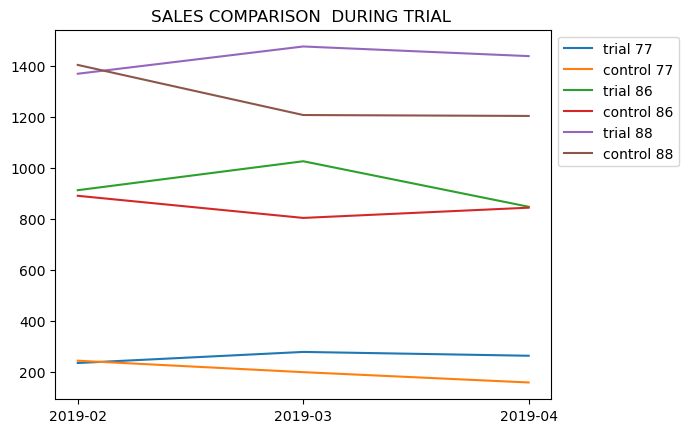

In [64]:
trial_77=during_trial[during_trial['STORE_NBR']==77]
control_77=during_trial[during_trial['STORE_NBR']==233]
plt.plot(trial_77['MONTH_YEAR'].astype(str),trial_77['MONTHLY_SALES'],label='trial 77')
plt.plot(control_77['MONTH_YEAR'].astype(str),control_77['MONTHLY_SALES'],label='control 77')


trial_86=during_trial[during_trial['STORE_NBR']==86]
control_86=during_trial[during_trial['STORE_NBR']==155]
plt.plot(trial_86['MONTH_YEAR'].astype(str),trial_86['MONTHLY_SALES'],label='trial 86')
plt.plot(control_86['MONTH_YEAR'].astype(str),control_86['MONTHLY_SALES'],label='control 86')

trial_88=during_trial[during_trial['STORE_NBR']==88]
control_88=during_trial[during_trial['STORE_NBR']==237]
plt.plot(trial_88['MONTH_YEAR'].astype(str),trial_88['MONTHLY_SALES'],label='trial 88')
plt.plot(control_88['MONTH_YEAR'].astype(str),control_88['MONTHLY_SALES'],label='control 88')


plt.title("SALES COMPARISON  DURING TRIAL ")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

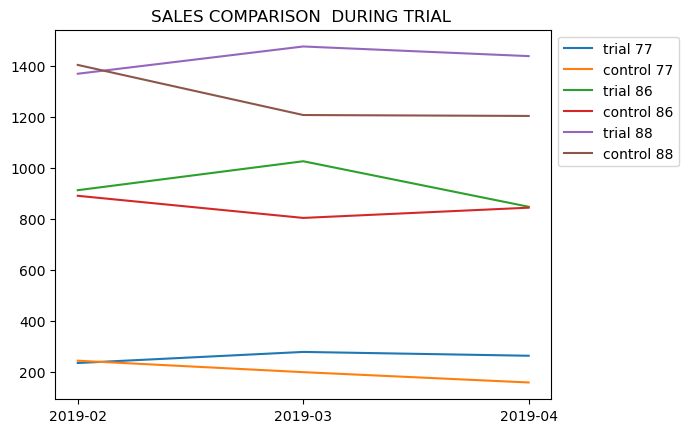

In [66]:
trial_77=during_trial[during_trial['STORE_NBR']==77]
control_77=during_trial[during_trial['STORE_NBR']==233]
plt.plot(trial_77['MONTH_YEAR'].astype(str),trial_77['MONTHLY_SALES'],label='trial 77')
plt.plot(control_77['MONTH_YEAR'].astype(str),control_77['MONTHLY_SALES'],label='control 77')


trial_86=during_trial[during_trial['STORE_NBR']==86]
control_86=during_trial[during_trial['STORE_NBR']==155]
plt.plot(trial_86['MONTH_YEAR'].astype(str),trial_86['MONTHLY_SALES'],label='trial 86')
plt.plot(control_86['MONTH_YEAR'].astype(str),control_86['MONTHLY_SALES'],label='control 86')

trial_88=during_trial[during_trial['STORE_NBR']==88]
control_88=during_trial[during_trial['STORE_NBR']==237]
plt.plot(trial_88['MONTH_YEAR'].astype(str),trial_88['MONTHLY_SALES'],label='trial 88')
plt.plot(control_88['MONTH_YEAR'].astype(str),control_88['MONTHLY_SALES'],label='control 88')


plt.title("SALES COMPARISON  DURING TRIAL ")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [68]:
total_sale=during_trial.groupby('STORE_NBR')[['MONTHLY_SALES','MONTHLY_TRANS',]].sum().reset_index()
print(total_sale[total_sale['STORE_NBR'].isin([77,233])])
print(total_sale[total_sale['STORE_NBR'].isin([86,155])])
print(total_sale[total_sale['STORE_NBR'].isin([88,237])])


     STORE_NBR  MONTHLY_SALES  MONTHLY_TRANS
73          77          777.0            148
228        233          601.7            121
     STORE_NBR  MONTHLY_SALES  MONTHLY_TRANS
81          86         2788.2            408
150        155         2540.2            368
     STORE_NBR  MONTHLY_SALES  MONTHLY_TRANS
83          88         4286.8            486
232        237         3817.6            430


In [70]:
mask= (chips['MONTH_YEAR']>='2019-02') & (chips['MONTH_YEAR']>='2019-04')
TRIALPERIOD=chips[mask]
trial_period=TRIALPERIOD.groupby('STORE_NBR')[['PROD_QTY','TOT_SALES']].sum().reset_index()
print(trial_period[trial_period['STORE_NBR'].isin([77,233])])
print(trial_period[trial_period['STORE_NBR'].isin([86,155])])
print(trial_period[trial_period['STORE_NBR'].isin([88,237])])

     STORE_NBR  PROD_QTY  TOT_SALES
73          77       223      786.8
227        233       194      701.0
     STORE_NBR  PROD_QTY  TOT_SALES
81          86       742    2542.20
149        155       746    2597.65
     STORE_NBR  PROD_QTY  TOT_SALES
83          88       914    4070.55
231        237       806    3557.50


In [72]:
unique_customers=TRIALPERIOD.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique().reset_index(name='no of UNIQUE customers')
print(unique_customers[unique_customers['STORE_NBR'].isin([77,233])])
print(unique_customers[unique_customers['STORE_NBR'].isin([86,155])])
print(unique_customers[unique_customers['STORE_NBR'].isin([88,237])])

     STORE_NBR  no of UNIQUE customers
73          77                     130
227        233                     108
     STORE_NBR  no of UNIQUE customers
81          86                     207
149        155                     198
     STORE_NBR  no of UNIQUE customers
83          88                     259
231        237                     269


In [74]:
Total_transactions=TRIALPERIOD.groupby('STORE_NBR')['TXN_ID'].size().reset_index(name='no of TRANSACTIONS')
combine=pd.merge(unique_customers,Total_transactions,on=['STORE_NBR'])
combine['avg trans per cust']=combine['no of TRANSACTIONS']/combine['no of UNIQUE customers']
print(combine[combine['STORE_NBR'].isin([77,233])])
print(combine[combine['STORE_NBR'].isin([86,155])])
print(combine[combine['STORE_NBR'].isin([88,237])])

     STORE_NBR  no of UNIQUE customers  no of TRANSACTIONS  avg trans per cust
73          77                     130                 144            1.107692
227        233                     108                 135            1.250000
     STORE_NBR  no of UNIQUE customers  no of TRANSACTIONS  avg trans per cust
81          86                     207                 373            1.801932
149        155                     198                 379            1.914141
     STORE_NBR  no of UNIQUE customers  no of TRANSACTIONS  avg trans per cust
83          88                     259                 465            1.795367
231        237                     269                 418            1.553903


In [82]:
chips.to_csv("final.csv")